<h1><b>Assignment - 2</b></h1>
<p>Name:     Gaurav Navada<br>
Reg.No.:  20BKT0128<br>
Gmail: gaurav.navada2020@vitstudent.ac.in</p>

In [95]:
#All libraries getting imported

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder  ##Encoding non-numerical Data
from sklearn.preprocessing import StandardScaler  ##Scaling the Features
from sklearn.model_selection import train_test_split  ##Splitting the Dataset into test and train data
from keras.models import Sequential  ##to make a neural netowrk model
from keras.layers import Dense  ##to add layers to the neural network model
import matplotlib.pyplot as plt  ##To plot the accuracy and loss

In [10]:
#Reading the CSV File
data = pd.read_csv('/content/drug200.csv')
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


<h4>Information about the CSV file</h4>

In [11]:
#Show coloumn names
data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [12]:
#Show Data Statistics
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


<h2>Task-1: Data Pre-processing</h2>

<h4>1) Check For missing Values</h4>

In [13]:
data.isnull().sum()
#no missing values found - no need to replace

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

<h4>2) Encoding non-numerical Data</h4>

In [14]:
#First let us check which data is not numerical (not int or float)
data.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [58]:
#Next, we assign our original data to a new varriable 'df'
#This 'df' is our data where we encode and make changes to it
df = data.copy()
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [59]:
#Next we encode the non-numerical data to numerical data, and record this conversion of every column in a dictionary
label_encoder_x= LabelEncoder()  

#Encoding 'Sex' column Values
temp = df['Sex'].unique()  ##finding all unique values of column
df['Sex'] = label_encoder_x.fit_transform(df['Sex'])

Sex_values = {x:v for (x, v) in zip(temp, range(0, len(temp)))}  ##Making original value of column to numerical data dictionary
print(f"'Sex' Column Value -> numerical: {Sex_values}")

#Encoding 'Sex' column Values
temp = df['BP'].unique()  ##finding all unique values of column
df['BP'] = label_encoder_x.fit_transform(df['BP'])

BP_values = {x:v for (x, v) in zip(temp, range(0, len(temp)))}  ##Making original value of column to numerical data dictionary
print(f"'BP' Column Value -> numerical: {BP_values}")

#Encoding 'Cholesterol' column Values
temp = df['Cholesterol'].unique()  ##finding all unique values of column
df['Cholesterol'] = label_encoder_x.fit_transform(df['Cholesterol'])

Cholesterol_values = {x:v for (x, v) in zip(temp, range(0, len(temp)))}  ##Making original value of column to numerical data dictionary
print(f"'Cholesterol' Column Value -> numerical: {Cholesterol_values}")

print()
df.head()

'Sex' Column Value -> numerical: {'F': 0, 'M': 1}
'BP' Column Value -> numerical: {'HIGH': 0, 'LOW': 1, 'NORMAL': 2}
'Cholesterol' Column Value -> numerical: {'HIGH': 0, 'NORMAL': 1}



,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,DrugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,DrugY


In [62]:
##Next Step is to make a dictionary with numerical value -> Actual Value of target class
##This is done because prediction we be in terms of numerical value
##Using this mapping dictionary, it is easy to find what class/ Value this numerical data corresponds to

#Temporary variable to store target class
ytemp = df.iloc[:, [-1]].copy()  ##Data we want to predict

#Saving the unique values of drug in a temp array
temp = df['Drug'].unique()  

#Encode the non-numerical data
ytemp['Drug'] = label_encoder_x.fit_transform(ytemp['Drug'])

#Save the Mapping of unique value of numerical encoded data -> Actual Value (Since this is our target class)
Drug_values = {x:v for (x, v) in zip(ytemp['Drug'].unique(), temp)}  
print(f"'Drug' Column Value -> numerical: {Drug_values}")

'Drug' Column Value -> numerical: {0: 'DrugY', 3: 'drugC', 4: 'drugX', 1: 'drugA', 2: 'drugB'}


<h4>3) Feature Scaling</h4>

In [63]:
#Scaling the values of 'Age' and 'Na_to_K' columns
scale = StandardScaler() 

#Scaling 'Age' values
temp = np.reshape(df['Age'].values, [200, 1])
temp = scale.fit_transform(temp)
df['Age'] = temp

#Scaling 'Na_to_K' values
temp = np.reshape(df['Na_to_K'].values, [200, 1])
temp = scale.fit_transform(temp)
df['Na_to_K'] = temp

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,-1.291591,0,0,0,1.286522,DrugY
1,0.162699,1,1,0,-0.415145,drugC
2,0.162699,1,1,0,-0.828558,drugC
3,-0.988614,0,2,0,-1.149963,drugX
4,1.011034,0,1,0,0.271794,DrugY


<h4>4) Splitting the dataset into train and test data</h4>

In [64]:
#We first have to split the dataset into the Features and the value we have to predict (Drug)

X = df.iloc[:, 0:-1]  ##All features of the dataset
Y = df.iloc[:, [-1]]  ##Data we want to predict

In [65]:
#Features of Dataset
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,-1.291591,0,0,0,1.286522
1,0.162699,1,1,0,-0.415145
2,0.162699,1,1,0,-0.828558
3,-0.988614,0,2,0,-1.149963
4,1.011034,0,1,0,0.271794


In [66]:
#Data column we want to predict
Y.head()

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY


In [67]:
# Perform one-hot encoding on target Class Y
one_hot_encoded = pd.get_dummies(df['Drug'])

# Concatenate the one-hot encoded columns with the original dataframe
Y = pd.concat([Y, one_hot_encoded], axis=1)

#Drop the target value Column
Y = Y.drop(['Drug'], axis = 1)

print("Y - Target Class:")
print(Y)

Y - Target Class:
     DrugY  drugA  drugB  drugC  drugX
0        1      0      0      0      0
1        0      0      0      1      0
2        0      0      0      1      0
3        0      0      0      0      1
4        1      0      0      0      0
..     ...    ...    ...    ...    ...
195      0      0      0      1      0
196      0      0      0      1      0
197      0      0      0      0      1
198      0      0      0      0      1
199      0      0      0      0      1

[200 rows x 5 columns]


In [68]:
#Next, we split the Data set into training and testing data
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size= 0.3, random_state=1)  ##70-30 percentage split for train-test Data

In [72]:
y_test.shape

(60, 5)

<h2>Task-2: Building the ANN Model with (Input Layer, Min 3 Hidden Layer and Output Layer)</h2>

<h4>1) Define the number of features in inpute data and number of output labels</h4>

In [88]:
input_dim = x_train.shape[1]  ##number of features in the input data {Age, Sex, BP, Cholesterol, Na_to_K}
output_dim = y_train.shape[1]  ##number of output labels => {'DrugY': 0, 'drugC': 3, 'drugX': 4, 'drugA': 1, 'drugB': 2}

<h4>2) Create the model</h4>

In [89]:
model = Sequential()

<h4>3) Build the ANN Model Architecture</h4>

In [90]:
# Add the input layer
model.add(Dense(units=64, activation='relu', input_shape=(input_dim, )))

# Add additional hidden layers
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))

# Add the output layer
model.add(Dense(output_dim, activation='sigmoid'))

<h4>4) Compile the model</h4>

In [91]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

<h4>5) Print the model Summary</h4>

In [92]:
# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 64)                384       
                                                                 
 dense_11 (Dense)            (None, 128)               8320      
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 5)                 165       
                                                                 
Total params: 19,205
Trainable params: 19,205
Non-trainable params: 0
_________________________________________________________________


<h4>6) Train the model</h4>

In [93]:
history = model.fit(x_train,  #Freatures
                    y_train,  #Target Vector
                    steps_per_epoch = 13,  #Steps per epochs
                    epochs = 25,  #Number of epoch
                    batch_size= 10,  #Number of observations per batch
                    validation_data= (x_test, y_test),  #Test Data
                    )

Epoch 1/25
13/13 [==============================] - 1s 19ms/step - loss: 1.4798 - accuracy: 0.4154 - val_loss: 1.3375 - val_accuracy: 0.6000
Epoch 2/25
13/13 [==============================] - 0s 5ms/step - loss: 1.1655 - accuracy: 0.6692 - val_loss: 0.9742 - val_accuracy: 0.7333
Epoch 3/25
13/13 [==============================] - 0s 6ms/step - loss: 0.9099 - accuracy: 0.6538 - val_loss: 0.6951 - val_accuracy: 0.7500
Epoch 4/25
13/13 [==============================] - 0s 5ms/step - loss: 0.6900 - accuracy: 0.7154 - val_loss: 0.5487 - val_accuracy: 0.7667
Epoch 5/25
13/13 [==============================] - 0s 6ms/step - loss: 0.5159 - accuracy: 0.8154 - val_loss: 0.4522 - val_accuracy: 0.8333
Epoch 6/25
13/13 [==============================] - 0s 6ms/step - loss: 0.5264 - accuracy: 0.8154 - val_loss: 0.3697 - val_accuracy: 0.8833
Epoch 7/25
13/13 [==============================] - 0s 4ms/step - loss: 0.3146 - accuracy: 0.9000 - val_loss: 0.3143 - val_accuracy: 0.8833
Epoch 8/25
13/13 [=

<h4>7) Visualization of accuracy and loss</h4>

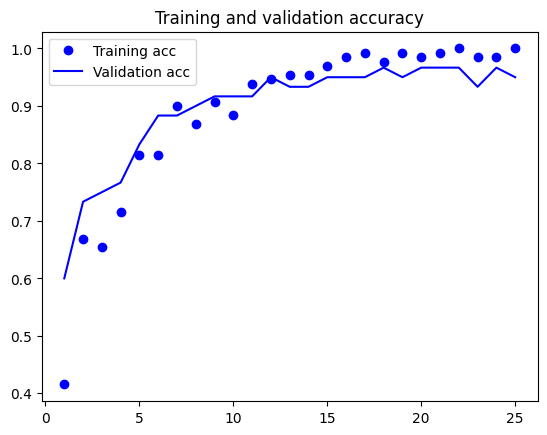

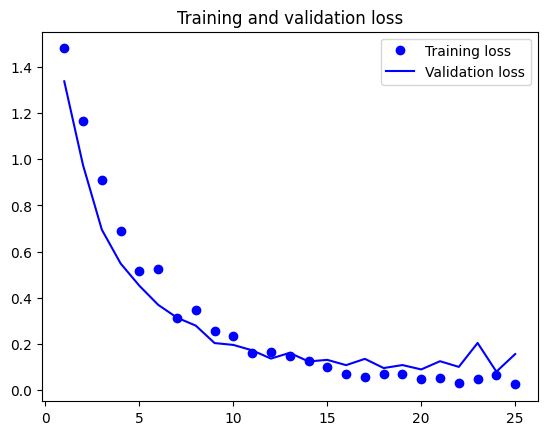

In [96]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

<h2>Task-3: Test the model with random data</h2>

<h4>1) Creating Random Data</h4>

In [126]:
#In order to test our model, let us make 10 random datasets:
temp = [[np.random.randint(low = data['Age'].min(), high = data['Age'].max()), 
         np.random.choice(data['Sex'].unique()), 
         np.random.choice(data['BP'].unique()),
         np.random.choice(data['Cholesterol'].unique()),
         round(np.random.uniform(low = data['Age'].min(), high = data['Age'].max()), 3)] for i in range(10)]
temp

[[73, 'F', 'HIGH', 'NORMAL', 44.731],
 [31, 'M', 'LOW', 'HIGH', 65.238],
 [45, 'M', 'LOW', 'HIGH', 15.306],
 [34, 'F', 'NORMAL', 'NORMAL', 71.577],
 [70, 'M', 'LOW', 'HIGH', 45.534],
 [47, 'M', 'NORMAL', 'NORMAL', 57.718],
 [20, 'M', 'NORMAL', 'NORMAL', 73.349],
 [18, 'F', 'LOW', 'NORMAL', 26.375],
 [27, 'F', 'LOW', 'HIGH', 58.849],
 [51, 'M', 'HIGH', 'HIGH', 57.053]]

In [127]:
#Convert the above array to Data frame
random_data = pd.DataFrame(temp, columns = df.columns[:-1])
random_data

,Age,Sex,BP,Cholesterol,Na_to_K
0,73,F,HIGH,NORMAL,44.731
1,31,M,LOW,HIGH,65.238
2,45,M,LOW,HIGH,15.306
3,34,F,NORMAL,NORMAL,71.577
4,70,M,LOW,HIGH,45.534
5,47,M,NORMAL,NORMAL,57.718
6,20,M,NORMAL,NORMAL,73.349
7,18,F,LOW,NORMAL,26.375
8,27,F,LOW,HIGH,58.849
9,51,M,HIGH,HIGH,57.053


<h4>2) Pre-processing this random data</h4>

In [128]:
#Pre-processing the data

#Changing column values of 'Sex', 'BP' and 'Cholesterol' to numerical data
random_data['Sex'] = [Sex_values[i] for i in random_data['Sex']]
random_data['BP'] = [BP_values[i] for i in random_data['BP']]
random_data['Cholesterol'] = [Cholesterol_values[i] for i in random_data['Cholesterol']]

#Scaling 'Age' values
random_data['Age'] = scale.fit_transform(np.reshape(random_data['Age'].values, [10, 1]))

#Scaling 'Na_to_K' values
random_data['Na_to_K'] = scale.fit_transform(np.reshape(random_data['Na_to_K'].values, [10, 1]))

random_data

,Age,Sex,BP,Cholesterol,Na_to_K
0,1.721123,0,0,1,-0.381566
1,-0.581016,1,1,0,0.762073
2,0.186364,1,1,0,-2.022547
3,-0.416578,0,2,1,1.115588
4,1.556684,1,1,0,-0.336784
5,0.295989,1,2,1,0.342696
6,-1.183957,1,2,1,1.214409
7,-1.293583,0,1,1,-1.405248
8,-0.800267,0,1,0,0.405770
9,0.515241,1,0,0,0.305610


<h4>3) Model Prediction of the Random Data</h4>

In [129]:
#Passing the above data to the model
prediction = model.predict(random_data)
prediction

1/1 [==============================] - 0s 107ms/step


array([[1.42307341e-01, 2.35943515e-02, 9.81640697e-01, 1.38508841e-01,
        1.42390534e-01],
       [9.99993026e-01, 3.83058540e-03, 2.81328964e-03, 2.00587147e-05,
        2.38626823e-03],
       [1.51971006e-04, 9.87965047e-01, 6.43320322e-01, 9.99240339e-01,
        5.95937073e-01],
       [1.00000000e+00, 1.10996305e-04, 7.65478308e-06, 1.54024544e-08,
        9.19311889e-04],
       [9.20551419e-01, 4.36199922e-03, 2.17667758e-01, 1.42907113e-01,
        3.90498549e-01],
       [9.99996841e-01, 1.50193446e-04, 1.11866875e-05, 3.65473034e-06,
        7.78167918e-02],
       [1.00000000e+00, 4.18377058e-05, 3.42951284e-06, 3.76655107e-09,
        2.67905474e-04],
       [7.39507086e-04, 8.54824483e-01, 2.25919578e-03, 9.97108936e-01,
        9.98802483e-01],
       [9.99775946e-01, 1.38826706e-02, 1.07352380e-02, 1.53438479e-03,
        2.25846749e-02],
       [9.97744977e-01, 5.84767982e-02, 1.24485664e-01, 2.44889408e-03,
        1.19667742e-02]], dtype=float32)

In [133]:
#Final Predicted class of the 'random_data'
pred = [Drug_values[i.argmax()] for i in prediction]
pred

['drugB',
 'DrugY',
 'drugC',
 'DrugY',
 'DrugY',
 'DrugY',
 'DrugY',
 'drugX',
 'DrugY',
 'DrugY']